In [12]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
#import pylab
import os
#pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [33]:
KIND = 'val2017'
ANNO_FILE = f"/data/datasets/coco/annotations/instances_{KIND}.json"
IMAGE_DIR = f"/data/datasets/coco/images/{KIND}"

In [34]:
coco=COCO(ANNO_FILE)

loading annotations into memory...
Done (t=0.57s)
creating index...
index created!


In [35]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(', '.join(nms)))

COCO categories: 
person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light, fire hydrant, stop sign, parking meter, bench, bird, cat, dog, horse, sheep, cow, elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, frisbee, skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard, tennis racket, bottle, wine glass, cup, fork, knife, spoon, bowl, banana, apple, sandwich, orange, broccoli, carrot, hot dog, pizza, donut, cake, chair, couch, potted plant, bed, dining table, toilet, tv, laptop, mouse, remote, keyboard, cell phone, microwave, oven, toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear, hair drier, toothbrush



In [36]:
nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(', '.join(nms)))

COCO supercategories: 
animal, indoor, vehicle, furniture, sports, accessory, electronic, kitchen, appliance, outdoor, person, food


In [37]:
catIds = coco.getCatIds(catNms=['persone']);
imgIds = coco.getImgIds(catIds=catIds)

In [38]:
img = coco.loadImgs(imgIds[0])[0]

In [39]:
img

{'license': 4,
 'file_name': '000000397133.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'height': 427,
 'width': 640,
 'date_captured': '2013-11-14 17:02:52',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'id': 397133}

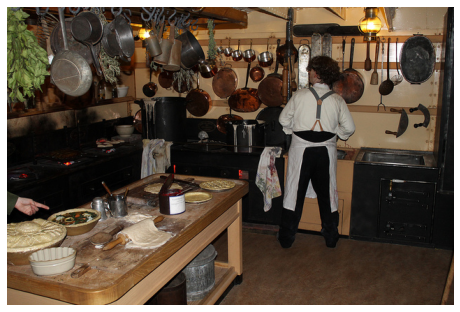

In [40]:
I = io.imread(os.path.join(IMAGE_DIR, img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

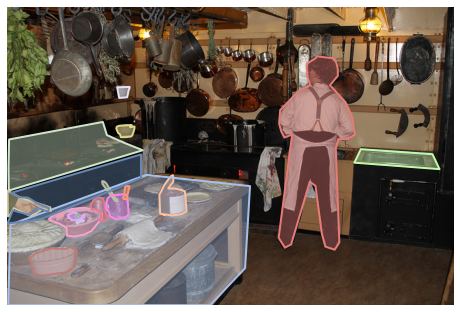

In [41]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [42]:
anns[0].keys()

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])